In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns   


In [204]:
df = pd.read_csv('steam-200k.csv')

# rename the columns 
# it does not have column name, add column name.
# df.columns  = ['UserId', 'Game','Play','hrs_play','0' ]
# df.head()


df = pd.read_csv("steam-200k.csv", header=None, index_col=None, names=['UserID', 'Game', 'Action', 'Hours', 'Other'])
df.head()

dfc = df.copy()

df = df.drop(columns='Other')

df

,UserID,Game,Action,Hours
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0
1,151603712,The Elder Scrolls V Skyrim,play,273.0
2,151603712,Fallout 4,purchase,1.0
3,151603712,Fallout 4,play,87.0
4,151603712,Spore,purchase,1.0
...,...,...,...,...
199995,128470551,Titan Souls,play,1.5
199996,128470551,Grand Theft Auto Vice City,purchase,1.0
199997,128470551,Grand Theft Auto Vice City,play,1.5
199998,128470551,RUSH,purchase,1.0


### Understanding the features: 

1. UserId = The primary key representing the player. The userId.
2. Game = Game Title
3. Action = played and purchased.
4. Other = Don't know 


In [205]:
# lets see how many duplicate value in the Game feature.
x = df['Game'].nunique()

print(x) # there are 5155 unique Games.
dupG = df[df.duplicated('Game', keep=False)]

Ft_oc = df['Game'].value_counts()





5155


In [206]:
# we have to remove the purchase value from the Action feature.
# for the same UserID, if the Game is Play, then for that UserID, remove the Game purchase row

# # Identify rows with 'play' action
# play_rows = df[df["Action"] == "play"]

# # Create a set of (UserID, Game) pairs for 'play' action
# play_pairs = set(zip(play_rows["UserID"], play_rows["Game"]))

# # Filter out rows where (UserID, Game) is in play_pairs and Action is 'purchase'
# filtered_df = df[~((df["Action"] == "purchase") & (df[["UserID", "Game"]].apply(tuple, axis=1).isin(play_pairs)))]

# print(filtered_df)




In [207]:
# set the purchase hours to 0 
df 

df.loc[df['Action']=="purchase", "Hours"] = 0

# # drop the Action feature
# df = df.drop(columns='Action')
df


# we the slice erroe comes up becaue we are making a permanent change. so make a change, copy it, like push it to df.


,UserID,Game,Action,Hours
0,151603712,The Elder Scrolls V Skyrim,purchase,0.0
1,151603712,The Elder Scrolls V Skyrim,play,273.0
2,151603712,Fallout 4,purchase,0.0
3,151603712,Fallout 4,play,87.0
4,151603712,Spore,purchase,0.0
...,...,...,...,...
199995,128470551,Titan Souls,play,1.5
199996,128470551,Grand Theft Auto Vice City,purchase,0.0
199997,128470551,Grand Theft Auto Vice City,play,1.5
199998,128470551,RUSH,purchase,0.0


In [208]:
#lets check for duplicate data
dfg = df[df.duplicated()]


df = df.drop_duplicates()
# dfg is a darframe full of extra values.

# lets check for null values 
df.isnull().sum() # no null values




df

,UserID,Game,Action,Hours
0,151603712,The Elder Scrolls V Skyrim,purchase,0.0
1,151603712,The Elder Scrolls V Skyrim,play,273.0
2,151603712,Fallout 4,purchase,0.0
3,151603712,Fallout 4,play,87.0
4,151603712,Spore,purchase,0.0
...,...,...,...,...
199995,128470551,Titan Souls,play,1.5
199996,128470551,Grand Theft Auto Vice City,purchase,0.0
199997,128470551,Grand Theft Auto Vice City,play,1.5
199998,128470551,RUSH,purchase,0.0


In [209]:
# data consistency check.
is_same_type = df['UserID'].dtype == df['UserID'].iloc[0].dtype
is_same_type

x = df['UserID'].nunique()
x 


12393

### Feature Creation 
- User specific
- Game Specific 


In [210]:
# User specific 
df.loc[:, 'Tot_hrs_played'] = df.groupby('UserID')['Hours'].transform('sum')

# Step 1: Count the occurrences of each UserId
df.loc[:,'User_count'] = df.groupby('UserID')['UserID'].transform('count')
df.loc[:, 'Avg_play_time'] = df["Tot_hrs_played"]/df['User_count']

df = df.rename(columns={"User_count":"#Games"})


# # Calculate the count of each UserID
# user_counts = df['UserID'].value_counts()

# # Map the counts back to the DataFrame
# df['User_count'] = df['UserID'].map(user_counts)



# Create a pivot table to count 'play' and 'purchase' actions for each game
pivot_table = df.pivot_table(
    index='Game',
    columns='Action',
    values='UserID',  # Use 'UserID' for counts (can also use another column)
    aggfunc='count',
    fill_value=0  # Replace missing values with 0
)

# Calculate retention rate
pivot_table['rtn_rate'] = pivot_table['play'] / pivot_table['purchase']

# Merge the retention rate back into the original DataFrame
df = df.merge(pivot_table['rtn_rate'], on='Game', how='left')


df

C:\Users\nafee\AppData\Local\Temp\ipykernel_30984\1445072146.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'Tot_hrs_played'] = df.groupby('UserID')['Hours'].transform('sum')
C:\Users\nafee\AppData\Local\Temp\ipykernel_30984\1445072146.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'User_count'] = df.groupby('UserID')['UserID'].transform('count')
C:\Users\nafee\AppData\Local\Temp\ipykernel_30984\1445072146.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

,UserID,Game,Action,Hours,Tot_hrs_played,#Games,Avg_play_time,rtn_rate
0,151603712,The Elder Scrolls V Skyrim,purchase,0.0,439.9,66,6.665152,0.944212
1,151603712,The Elder Scrolls V Skyrim,play,273.0,439.9,66,6.665152,0.944212
2,151603712,Fallout 4,purchase,0.0,439.9,66,6.665152,0.994048
3,151603712,Fallout 4,play,87.0,439.9,66,6.665152,0.994048
4,151603712,Spore,purchase,0.0,439.9,66,6.665152,0.865672
...,...,...,...,...,...,...,...,...
199288,128470551,Titan Souls,play,1.5,426.9,32,13.340625,0.800000
199289,128470551,Grand Theft Auto Vice City,purchase,0.0,426.9,32,13.340625,0.442308
199290,128470551,Grand Theft Auto Vice City,play,1.5,426.9,32,13.340625,0.442308
199291,128470551,RUSH,purchase,0.0,426.9,32,13.340625,0.375000


In [211]:
# Game specific

#1. % of tot Time spent on each game.
df.loc[:, 'Hr_rate'] = (df['Hours']/df['Tot_hrs_played'])*100

#2. Pop_scr = Number of ppl that have played this game

df['Pop_src'] = df.groupby('Game')['UserID'].transform('count')

# Median Playtime.


# Game retention. % of user who played a specific game after purchasing. How much the game was successful in 




# we have to remove the purchase value from the Action feature.
# for the same UserID, if the Game is Play, then for that UserID, remove the Game purchase row

# Identify rows with 'play' action
play_rows = df[df["Action"] == "play"]

# Create a set of (UserID, Game) pairs for 'play' action
play_pairs = set(zip(play_rows["UserID"], play_rows["Game"]))

# Filter out rows where (UserID, Game) is in play_pairs and Action is 'purchase'
filtered_df = df[~((df["Action"] == "purchase") & (df[["UserID", "Game"]].apply(tuple, axis=1).isin(play_pairs)))]

print(filtered_df)



df = filtered_df


# drop the Action feature
df = df.drop(columns='Action') 


# # text cleaning, remove the spaces from the name of games. 
# df['Game'] = df['Game'].str.replace(' ','')

df

           UserID                        Game Action  Hours  Tot_hrs_played  \
1       151603712  The Elder Scrolls V Skyrim   play  273.0           439.9   
3       151603712                   Fallout 4   play   87.0           439.9   
5       151603712                       Spore   play   14.9           439.9   
7       151603712           Fallout New Vegas   play   12.1           439.9   
9       151603712               Left 4 Dead 2   play    8.9           439.9   
...           ...                         ...    ...    ...             ...   
199284  128470551                Fallen Earth   play    2.4           426.9   
199286  128470551                 Magic Duels   play    2.2           426.9   
199288  128470551                 Titan Souls   play    1.5           426.9   
199290  128470551  Grand Theft Auto Vice City   play    1.5           426.9   
199292  128470551                        RUSH   play    1.4           426.9   

        #Games  Avg_play_time  rtn_rate    Hr_rate 

,UserID,Game,Hours,Tot_hrs_played,#Games,Avg_play_time,rtn_rate,Hr_rate,Pop_src
1,151603712,The Elder Scrolls V Skyrim,273.0,439.9,66,6.665152,0.944212,62.059559,1394
3,151603712,Fallout 4,87.0,439.9,66,6.665152,0.994048,19.777222,335
5,151603712,Spore,14.9,439.9,66,6.665152,0.865672,3.387133,125
7,151603712,Fallout New Vegas,12.1,439.9,66,6.665152,0.851632,2.750625,624
9,151603712,Left 4 Dead 2,8.9,439.9,66,6.665152,0.842271,2.023187,1752
...,...,...,...,...,...,...,...,...,...
199284,128470551,Fallen Earth,2.4,426.9,32,13.340625,0.396694,0.562193,169
199286,128470551,Magic Duels,2.2,426.9,32,13.340625,0.714286,0.515343,168
199288,128470551,Titan Souls,1.5,426.9,32,13.340625,0.800000,0.351370,9
199290,128470551,Grand Theft Auto Vice City,1.5,426.9,32,13.340625,0.442308,0.351370,150


# Explaining all the features.
- UserId : Individuals who bought the game.
- Game: Game title 
- Hours: This game played by a specific user
- Tot_hrs_played: How many hrs did the player played all the game in total.
- #Games: How many games each player has bought.
- Avg_play-time: mean hours of gameplay per game.
- rtn_rate : Retention rate of that game. How successfull that game was, in turning purchase to play. 1 means all puchase is play.
- Hr_rate: % of tot Time spent on each game. Like favourite score.
- Pop_scr: No of ppl that have purchased this game.

Note: Play 0 hours means, purchased but not played

# Content based and Collaborative Recommender

- Content Based: It is based on the content of th

In [212]:
df.describe()

df['Hr_rate'] = df['Hr_rate'].fillna(0)
# df = df.drop(column = '')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128816 entries, 1 to 199292
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   UserID          128816 non-null  int64  
 1   Game            128816 non-null  object 
 2   Hours           128816 non-null  float64
 3   Tot_hrs_played  128816 non-null  float64
 4   #Games          128816 non-null  int64  
 5   Avg_play_time   128816 non-null  float64
 6   rtn_rate        128816 non-null  float64
 7   Hr_rate         128816 non-null  float64
 8   Pop_src         128816 non-null  int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 9.8+ MB


### EDA
- Which game is highest played.
- Which game has more play time.
- Does avg_play time is dictated by which game you play the most ? 
- Does no of games dictates the total hours played ? 
- Does retention rate depend on how many players....

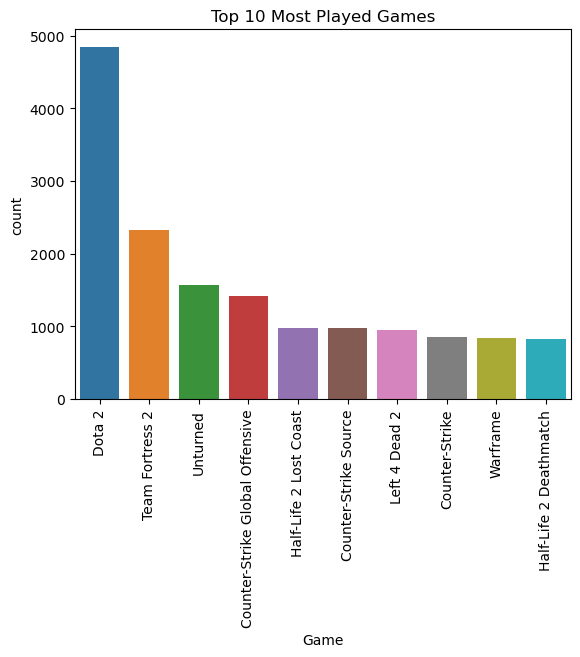

In [224]:
# there are too much games, so we only had to take top 10 games.

top_games = df['Game'].value_counts().nlargest(10).index
top_df = df[df['Game'].isin(top_games)]


sns.countplot(x='Game', data=top_df, order=top_games)
plt.title("Top 10 Most Played Games")
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.show()
